# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [25]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [27]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [28]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [29]:
# Extract all rows of data
table = soup.find('table', class_ = 'table') # select the table

rows = table.find_all('tr') # extract row data
for row in rows:
    print(row.text)


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [30]:

from datetime import datetime
# Create an empty list
mars_data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    data = row.text.split('\n')
    data.pop() # remove ' ' at beginning 
    data.pop(0) # and end of each row for cleaner list
    print(data)
   
    mars_data.append(data)

mars_data

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [31]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data)

mars_df.columns = mars_df.iloc[0] # set first row as column headers
mars_df = mars_df[1:] # remove first row from df

In [32]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
mars_df.dtypes

0
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [34]:
# Convert 'terrestrial_date' to datetime format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])


In [35]:
from datetime import datetime
# Change data types for data analysis
ntype = {'id': int,
         'sol': int,
         'ls': int,
         'month': int,
         'min_temp': float,
         'pressure': float}

new_mars_df = mars_df.astype(ntype)

In [36]:
# Confirm type changes were successful by examining data types again
new_mars_df.dtypes

0
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [37]:
# 1. How many months are there on Mars?
month_total = new_mars_df['month'].nunique()
print(f'There are {month_total} months on Mars.')

There are 12 months on Mars.


In [38]:
# 2. How many Martian days' worth of data are there?
mars_days = new_mars_df['terrestrial_date'].nunique()
print(f'We have {mars_days} Martian days worth of data.')

We have 1867 Martian days worth of data.


In [39]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month =round(new_mars_df.groupby('month')['min_temp'].mean(), 1)
avg_low_temp_by_month

month
1    -77.2
2    -79.9
3    -83.3
4    -82.7
5    -79.3
6    -75.3
7    -72.3
8    -68.4
9    -69.2
10   -72.0
11   -72.0
12   -74.5
Name: min_temp, dtype: float64

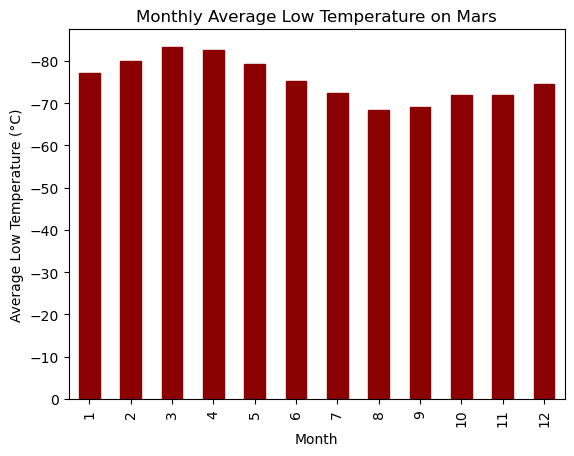

In [40]:
# Plot the average temperature by month
plot = avg_low_temp_by_month.plot(kind='bar', color='darkred', edgecolor='darkred')
plot.invert_yaxis()
plt.title('Monthly Average Low Temperature on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.show()

In [41]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = new_mars_df.loc[new_mars_df['min_temp'].idxmin()]['month']
# Identify the coldest and hottest months in Curiosity's location
hottest_month = new_mars_df.loc[new_mars_df['min_temp'].idxmax()]['month']


print(f'Coldest month: {coldest_month} | Hottest month: {hottest_month}')

Coldest month: 3 | Hottest month: 1


In [42]:
# 4. Average pressure by Martian month
average_pressure = round(new_mars_df.groupby('month')['pressure'].mean(), 1)
average_pressure

month
1     862.5
2     889.5
3     877.3
4     806.3
5     748.6
6     745.1
7     795.1
8     873.8
9     913.3
10    887.3
11    857.0
12    842.2
Name: pressure, dtype: float64

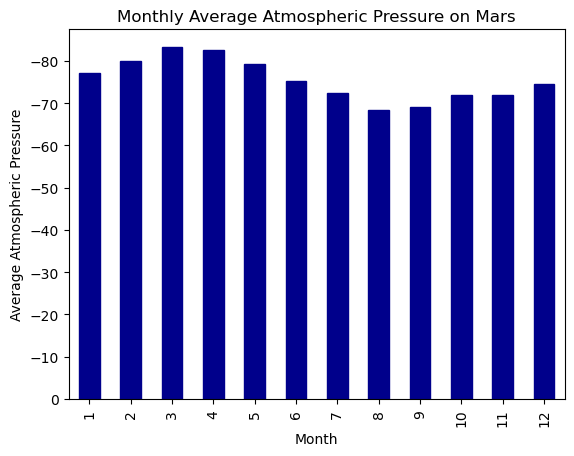

In [43]:
# Plot the average pressure by month
plot2 = avg_low_temp_by_month.plot(kind='bar', color='darkblue', edgecolor='darkblue')
plot2.invert_yaxis()
plt.title('Monthly Average Atmospheric Pressure on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

In [44]:
# 5. How many terrestrial (earth) days are there in a Martian year?

    # find the dates between one entire rotation around the sun (where ls = 0)
days_in_a_year = new_mars_df.loc[new_mars_df['ls']==0]
days_in_a_year

,id,terrestrial_date,sol,ls,month,min_temp,pressure
305,320,2013-08-01,351,0,1,-75.0,853.0
306,319,2013-08-02,352,0,1,-77.0,854.0
926,954,2015-06-19,1019,0,1,-81.0,849.0
927,938,2015-06-20,1020,0,1,-63.0,832.0
1580,1606,2017-05-06,1688,0,1,-76.0,840.0
1581,1610,2017-05-07,1689,0,1,-75.0,840.0


In [45]:
    # find the days difference between the dates
date_format = "%Y-%m-%d"
days_of_Martian_year = (datetime.strptime('2015-06-19',date_format)-datetime.strptime('2013-08-01',date_format)).days
print(f'Terrestrial (earth) days in a Martian year : {days_of_Martian_year} days')

Terrestrial (earth) days in a Martian year : 687 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [46]:
# Write the data to a CSV
new_mars_df.to_csv('mars_data.csv')

In [47]:
browser.quit()